In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [20]:
#Task 3 
#Using KNN and Naives Bayes:
#Extracting the DATA and assign the name of the columns
df = pd.read_csv('data_banknote_authentication.txt',sep=",",usecols=[0,1,2,3,4], names=['variance of Wavelet', 'skewness of Wavelet','curtosis of Wavelet','entropy of image','class'])
df.head()

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy of image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [21]:
df.tail()

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy of image,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [22]:
df.describe()

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy of image,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   variance of Wavelet  1372 non-null   float64
 1   skewness of Wavelet  1372 non-null   float64
 2   curtosis of Wavelet  1372 non-null   float64
 3   entropy of image     1372 non-null   float64
 4   class                1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [24]:

#1) Checking the Missing Value  and EDA (Exploratory Data Analysic)
#2) Encoding the Categorical Data
#3) Splitting the Dataset
#4) Feature Scaling 
#5) Train the Model
#6) Prediction,Accuracy,Precision and Recall

#Step1:
#Checking the Missing Value
df.isnull().sum()



variance of Wavelet    0
skewness of Wavelet    0
curtosis of Wavelet    0
entropy of image       0
class                  0
dtype: int64

In [25]:
#EDA (Explorarory Data Analysics)
df['class'].value_counts()


0    762
1    610
Name: class, dtype: int64

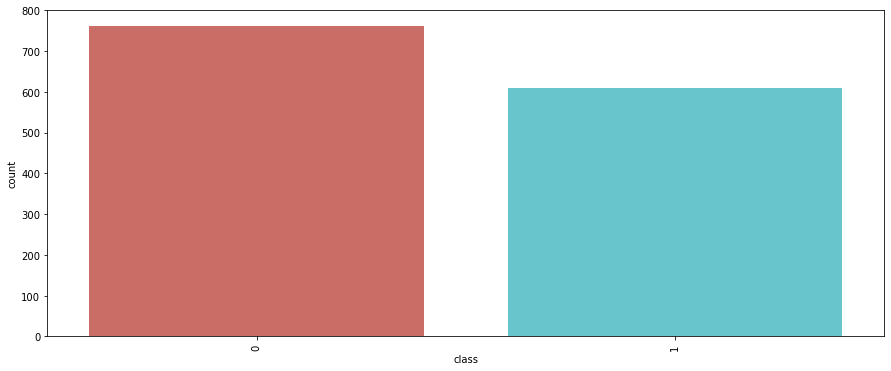

In [26]:
# Counts Plot  
plt.figure(figsize=(15,6))
sns.countplot('class',data=df,palette='hls')
plt.xticks(rotation=90)
plt.show()

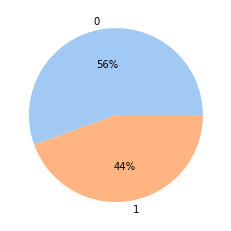

In [27]:
#pie Plot:
data1=df['class'].value_counts()
#print(data1)
labels = ['0', '1']
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data1, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [28]:
df.corr()

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy of image,class
variance of Wavelet,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness of Wavelet,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis of Wavelet,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy of image,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


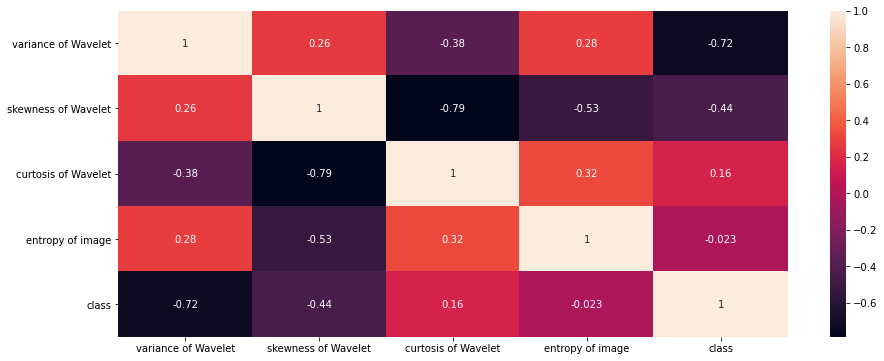

In [29]:
#Heap Map
#Co-relation
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [30]:
#Splitting the Dataset
#Taking Job scheduling  Dataset
dependent1=df["class"]
dependent1

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [31]:
# independent variables 
independent1= df.drop('class',axis='columns')
independent1

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy of image
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [76]:
#Divide the dataset into traintestsplit
#trainData=60%
#testData=40%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent1,dependent1,test_size=0.4)

In [77]:
X=np.array([[df['variance of Wavelet'],df['skewness of Wavelet'],df['curtosis of Wavelet'],df['entropy of image']]])
X

array([[[  3.6216 ,   4.5459 ,   3.866  , ...,  -3.7503 ,  -3.5637 ,
          -2.5419 ],
        [  8.6661 ,   8.1674 ,  -2.6383 , ..., -13.4586 ,  -8.3827 ,
          -0.65804],
        [ -2.8073 ,  -2.4586 ,   1.9242 , ...,  17.5932 ,  12.393  ,
           2.6842 ],
        [ -0.44699,  -1.4621 ,   0.10645, ...,  -2.7771 ,  -1.2823 ,
           1.1952 ]]])

In [78]:
X.shape

(1, 4, 1372)

In [79]:
Y=np.array(df['class'].values.tolist())
Y

array([0, 0, 0, ..., 1, 1, 1])

In [80]:
Y.shape

(1372,)

In [81]:
#Applying KNN Classifier Model
from sklearn.neighbors import KNeighborsClassifier
classifier1=KNeighborsClassifier(n_neighbors=1)
classifier1.fit(X_train,y_train)
classifier1.score(X_train,y_train)

1.0

In [82]:
pred2 = classifier1.predict(X_test)
print(pred2)

[1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0
 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1
 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0
 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 

In [83]:
print("Test set score:{:.2f}".format(np.mean(pred2==y_test)))

Test set score:1.00


In [84]:
pred2 = classifier1.predict([[0.32924,-4.45520,4.5718,-0.98880]])
print(pred2)

[0]


Text(0, 0.5, 'Error Rate')

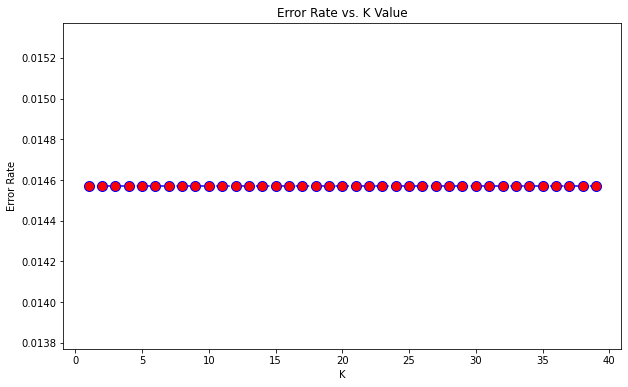

In [85]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    classifier1 = KNeighborsClassifier(n_neighbors=i)
    classifier1.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [71]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [72]:
model.score(X_train,y_train)

0.8371810449574727

In [73]:
pred3=model.predict([[0.32924,-4.45520,4.5718,-0.98880]])
pred3

array([1], dtype=int64)

In [67]:
pred3=model.predict(X_test)
pred3

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,